In [5]:
!pip install torch torchvision
!pip install opencv-python

# import torch
# import torch.nn as nn
# import torchvision
# import torchvision.transforms as T
# from torchvision.models.detection.ssd import SSD300_VGG16_Weights
# from torchvision.models.detection import ssd300_vgg16
# from torchvision.datasets import VOCDetection
# from torch.utils.data import DataLoader
# import matplotlib.pyplot as plt
# import cv2
# import os

# %matplotlib inline

# # Load SSD model with pre-trained weights
# model = ssd300_vgg16(weights=SSD300_VGG16_Weights.DEFAULT)

# # Freeze the backbone if needed
# for param in model.backbone.parameters():
#     param.requires_grad = False

# # Define transforms
# transform = T.Compose([
#     T.Resize((300, 300)),
#     T.ToTensor(),
#     T.Normalize(mean=[0.48235, 0.45882, 0.40784], std=[0.229, 0.224, 0.225])
# ])

# # Helper to parse VOC target to bounding boxes and labels
# def parse_voc_target(target):
#     boxes = []
#     labels = []
#     for obj in target['annotation']['object']:
#         bbox = obj['bndbox']
#         boxes.append([
#             float(bbox['xmin']),
#             float(bbox['ymin']),
#             float(bbox['xmax']),
#             float(bbox['ymax'])
#         ])
#         labels.append(1)  # Set all classes to 1 for demo; ideally map to VOC class index
#     return {
#         'boxes': torch.tensor(boxes, dtype=torch.float32),
#         'labels': torch.tensor(labels, dtype=torch.int64)
#     }

# # Load VOC dataset
# train_dataset = VOCDetection(root='data', year='2007', image_set='train', download=True, transform=transform)

# def collate_fn(batch):
#     images, targets = list(zip(*batch))
#     parsed_targets = [parse_voc_target(t) for t in targets]
#     return images, parsed_targets

# train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)

# # Optimizer
# optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model.to(device)

# # Training loop (2 epochs for demo)
# for epoch in range(2):
#     model.train()
#     total_loss = 0
#     for images, targets in train_loader:
#         images = [img.to(device) for img in images]
#         targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

#         loss_dict = model(images, targets)
#         losses = sum(loss for loss in loss_dict.values())

#         optimizer.zero_grad()
#         losses.backward()
#         optimizer.step()

#         total_loss += losses.item()
#     print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}")

# # Save model weights
# torch.save(model.state_dict(), 'mobilenet_ssd_weights.pth')

# # Inference and visualization
# model.eval()
# with torch.no_grad():
#     sample_image, _ = train_dataset[0]
#     input_tensor = sample_image.unsqueeze(0).to(device)
#     output = model(input_tensor)[0]

#     # Plot detections
#     image_np = sample_image.permute(1, 2, 0).numpy()
#     image_np = image_np * [0.229, 0.224, 0.225] + [0.48235, 0.45882, 0.40784]  # Unnormalize
#     image_np = (image_np * 255).astype('uint8')

#     plt.figure(figsize=(8, 6))
#     plt.imshow(image_np)
#     for box in output['boxes']:
#         x1, y1, x2, y2 = box.cpu().numpy().astype(int)
#         plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='red', linewidth=2))
#     plt.title('Sample Detection')
#     plt.axis('off')
#     plt.show()


Epoch 1: 100%|███████████████████████████████████████████████████████████████████████| 626/626 [35:41<00:00,  3.42s/it]


Epoch 1, Loss: 22389.4823


Epoch 2: 100%|███████████████████████████████████████████████████████████████████████| 626/626 [34:28<00:00,  3.30s/it]


Epoch 2, Loss: 23596.8896


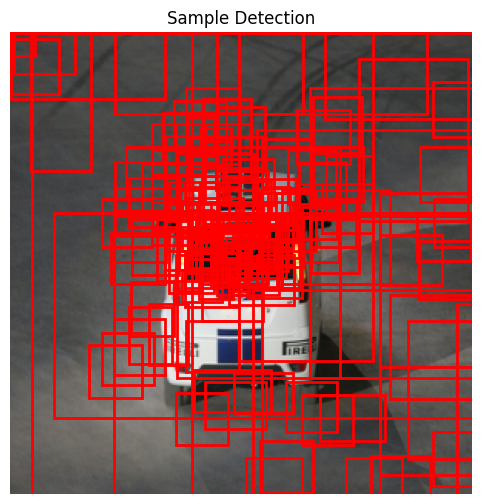

ValueError: Found input variables with inconsistent numbers of samples: [7818, 409937]

In [7]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as T
from torchvision.models.detection.ssd import SSD300_VGG16_Weights
from torchvision.models.detection import ssd300_vgg16
from torchvision.datasets import VOCDetection
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm

%matplotlib inline

# Load SSD model with pre-trained weights
model = ssd300_vgg16(weights=SSD300_VGG16_Weights.DEFAULT)

# Freeze the backbone if needed
for param in model.backbone.parameters():
    param.requires_grad = False

# Define transforms
transform = T.Compose([
    T.Resize((300, 300)),
    T.ToTensor(),
    T.Normalize(mean=[0.48235, 0.45882, 0.40784], std=[0.229, 0.224, 0.225])
])

# Helper to parse VOC target to bounding boxes and labels
def parse_voc_target(target):
    boxes = []
    labels = []
    for obj in target['annotation']['object']:
        bbox = obj['bndbox']
        boxes.append([
            float(bbox['xmin']),
            float(bbox['ymin']),
            float(bbox['xmax']),
            float(bbox['ymax'])
        ])
        labels.append(1)  # Set all classes to 1 for demo; ideally map to VOC class index
    return {
        'boxes': torch.tensor(boxes, dtype=torch.float32),
        'labels': torch.tensor(labels, dtype=torch.int64)
    }

# Load VOC dataset
train_dataset = VOCDetection(root='data', year='2007', image_set='train', download=True, transform=transform)
test_dataset = VOCDetection(root='data', year='2007', image_set='val', download=True, transform=transform)

def collate_fn(batch):
    images, targets = list(zip(*batch))
    parsed_targets = [parse_voc_target(t) for t in targets]
    return images, parsed_targets

train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training loop (2 epochs for demo)
for epoch in range(2):
    model.train()
    total_loss = 0
    for images, targets in tqdm(train_loader, desc=f"Epoch {epoch+1}"):
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        losses.backward()
        optimizer.step()

        total_loss += losses.item()
    print(f"Epoch {epoch + 1}, Loss: {total_loss:.4f}")

# Save model weights
torch.save(model.state_dict(), 'mobilenet_ssd_weights.pth')

# Inference and visualization
model.eval()
with torch.no_grad():
    sample_image, _ = train_dataset[0]
    input_tensor = sample_image.unsqueeze(0).to(device)
    output = model(input_tensor)[0]

    # Plot detections
    image_np = sample_image.permute(1, 2, 0).numpy()
    image_np = image_np * [0.229, 0.224, 0.225] + [0.48235, 0.45882, 0.40784]  # Unnormalize
    image_np = (image_np * 255).astype('uint8')

    plt.figure(figsize=(8, 6))
    plt.imshow(image_np)
    for box in output['boxes']:
        x1, y1, x2, y2 = box.cpu().numpy().astype(int)
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1, fill=False, edgecolor='red', linewidth=2))
    plt.title('Sample Detection')
    plt.axis('off')
    plt.show()



In [12]:
# Evaluation (basic precision and recall example for demo)
from sklearn.metrics import precision_score, recall_score

def evaluate(model, dataloader):
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, targets in dataloader:
            images = list(img.to(device) for img in images)
            true_labels = [1 for _ in targets]  # all images assumed to have object(s)

            outputs = model(images)

            pred_labels = []
            for output in outputs:
                if output['scores'].numel() > 0 and output['scores'].max().item() > 0.5:
                    pred_labels.append(1)  # Object detected
                else:
                    pred_labels.append(0)  # No object detected

            y_true.extend(true_labels)
            y_pred.extend(pred_labels)

    print("Precision:", precision_score(y_true, y_pred, average='binary', zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, average='binary', zero_division=0))
